In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('StudentsPerformance.csv')  # Place this CSV in the working directory
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.isnull().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
df['gender'].unique(), df['race/ethnicity'].unique()


(array(['female', 'male'], dtype=object),
 array(['group B', 'group C', 'group A', 'group D', 'group E'],
       dtype=object))

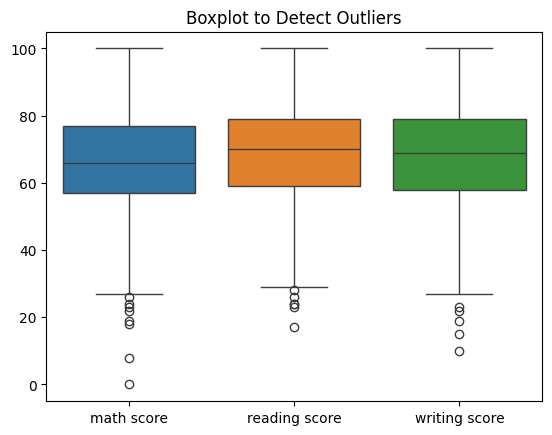

In [5]:
numeric_cols = ['math score', 'reading score', 'writing score']
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot to Detect Outliers")
plt.show()


In [6]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, np.where(df[col] > upper, upper, df[col]))


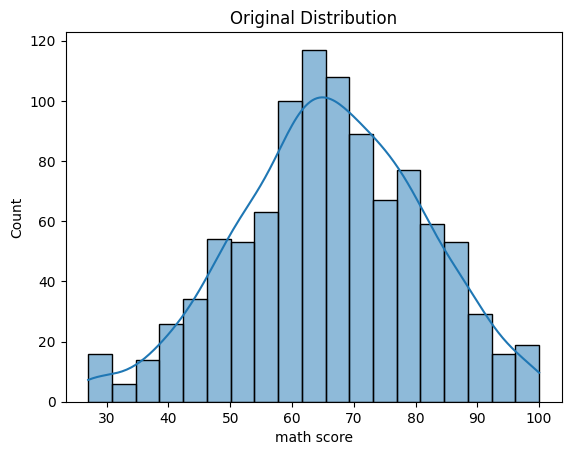

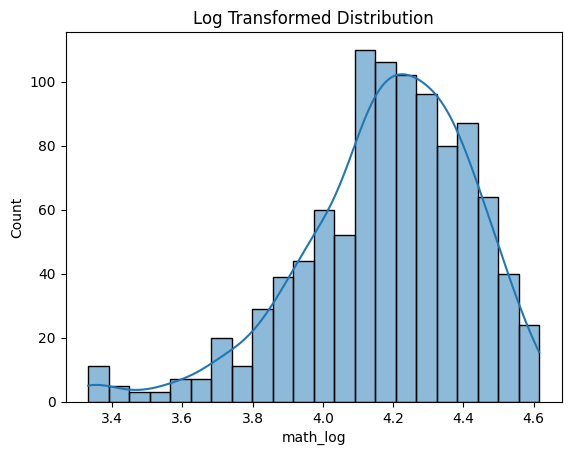

In [7]:
# Check original distribution
sns.histplot(df['math score'], kde=True)
plt.title("Original Distribution")
plt.show()

# Apply log transformation
df['math_log'] = np.log1p(df['math score'])

# Check transformed distribution
sns.histplot(df['math_log'], kde=True)
plt.title("Log Transformed Distribution")
plt.show()


In [8]:
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math_log
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0,4.290459
1,female,group C,some college,standard,completed,69.0,90.0,88.0,4.248495
2,female,group B,master's degree,standard,none,90.0,95.0,93.0,4.510860
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0,3.871201
4,male,group C,some college,standard,none,76.0,78.0,75.0,4.343805
